In [155]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',as_frame=False)


In [156]:
x=mnist.data
y=mnist.target

In [157]:
x.shape

(70000, 784)

In [158]:
y.shape

(70000,)

In [159]:
import matplotlib.pyplot as plt
def plot_img(img_data):
    img=img_data.reshape(28,28)
    plt.imshow(img,cmap='binary')
    plt.show()


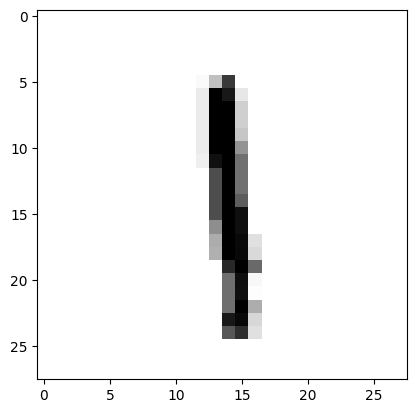

In [160]:
plot_img(x[8])

In [161]:
x[8]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   5,  63, 197,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  2

In [162]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]


In [163]:
x_train.shape

(60000, 784)

### Binary calssifer

In [164]:
y_train_5 = y_train == '5'  # True for all 5s, False for all other digits
y_test_5 = y_test == '5'

In [165]:
y_test_5[0]

np.False_

In [166]:
from sklearn.linear_model import SGDClassifier
sgd_clsf=SGDClassifier(random_state=42)
sgd_clsf.fit(x_train,y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


### useing k-fold 

In [167]:
from sklearn.model_selection import cross_val_score,cross_val_predict
cv_sgd_score=cross_val_score(sgd_clsf,x_train,y_train_5,cv=3,scoring='accuracy')  ### return the  accuracy
cv_sgd_pred=cross_val_predict(sgd_clsf,x_train,y_train_5,cv=3) ## return predictons

In [168]:
cv_sgd_pred

array([ True, False, False, ...,  True, False, False], shape=(60000,))

In [169]:
cv_sgd_score

array([0.95035, 0.96035, 0.9604 ])

#### dummy calssifier dont learn anything it  just predict according to the straegy like most frequent it is used just for compare if its results better than our model this is something wrong

In [170]:
from sklearn.dummy import DummyClassifier
dumClsf=DummyClassifier(strategy='most_frequent')
cv_dum_score=cross_val_score(dumClsf,x_train,y_train_5,cv=3)
cv_dum_pred=cross_val_predict(dumClsf,x_train,y_train_5,cv=3)

In [171]:
cv_dum_pred

array([False, False, False, ..., False, False, False], shape=(60000,))

#### evaluation by confuaion matrix (like mse in regression)

In [172]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score
conf_mat=confusion_matrix(y_train_5,cv_sgd_pred)

In [202]:
conf_mat

array([[53892,   687],
       [ 1891,  3530]])

In [174]:
print('precession : ',(precision_score(y_train_5,cv_sgd_pred)*100))
print('recall : ',(recall_score(y_train_5,cv_sgd_pred)*100))

precession :  83.70879772350011
recall :  65.11713705958311


In [175]:
from sklearn.metrics import f1_score
print(f1_score(y_train_5,cv_sgd_pred))

0.7325171197343847


### the decsion function is the tool of sgdclassifier that return score for each instance compare it with threshould then classify 

In [176]:
## return the score
sgd_clsf.decision_function([x_train[3]]) ## default threshould is 0 --> any data abve is +ve below -ve

array([-4623.84515943])

#### return  the score on which classification happens

In [177]:
## for sgd the method is decision_function
sgd_scoreOf_DF=cross_val_predict(sgd_clsf,x_train,y_train_5,cv=3,method='decision_function')
sgd_scoreOf_DF

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447], shape=(60000,))

# Clean Start Here

### Models

In [178]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve

In [179]:
# SGD Classifier
sgd_clf = SGDClassifier(random_state=42)
y_scores_sgd = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(rf_clf, x_train, y_train_5, cv=3, method="predict_proba")
y_scores_rf = y_probas_forest[:, 1]  # score = probability of positive class


### ROC curves

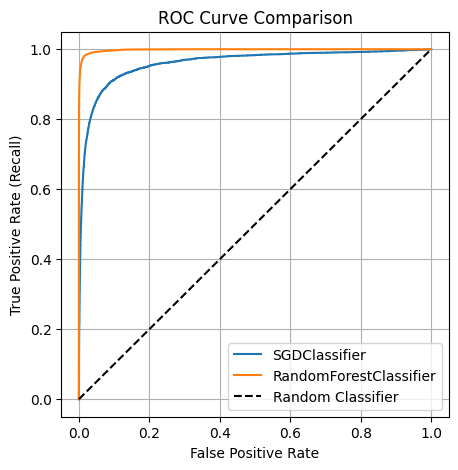

In [180]:
fpr_sgd, tpr_sgd, _ = roc_curve(y_train_5, y_scores_sgd)
fpr_rf, tpr_rf, _ = roc_curve(y_train_5, y_scores_rf)

plt.figure(figsize=(5, 5))
plt.plot(fpr_sgd, tpr_sgd, label="SGDClassifier")
plt.plot(fpr_rf, tpr_rf, label="RandomForestClassifier")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [181]:

print("ROC AUC (SGD):", roc_auc_score(y_train_5, y_scores_sgd))
print("ROC AUC (RF) :", roc_auc_score(y_train_5, y_scores_rf))


ROC AUC (SGD): 0.9604938554008616
ROC AUC (RF) : 0.9983436731328145


### PR Curves

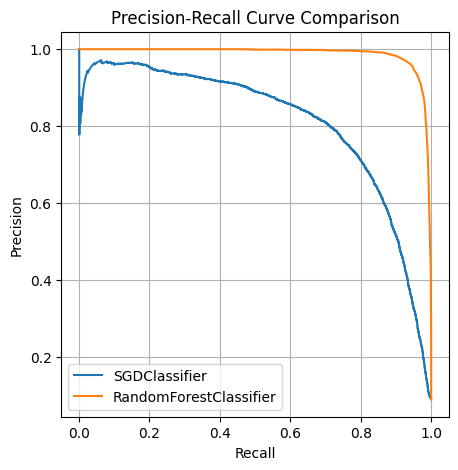

In [182]:
from sklearn.metrics import precision_recall_curve,average_precision_score,average_precision_score,f1_score
prec_sgd, rec_sgd, _ = precision_recall_curve(y_train_5, y_scores_sgd)
prec_rf, rec_rf, _ = precision_recall_curve(y_train_5, y_scores_rf)

"""
 _ = list of thresholds used to compute those values
(underscore means “I don’t care about saving this now”)
 """


plt.figure(figsize=(5, 5))
plt.plot(rec_sgd, prec_sgd, label="SGDClassifier")
plt.plot(rec_rf, prec_rf, label="RandomForestClassifier")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()



In [183]:

print("Average Precision (SGD):", average_precision_score(y_train_5, y_scores_sgd))
print("Average Precision (RF)  :", average_precision_score(y_train_5, y_scores_rf))

Average Precision (SGD): 0.8100417627526462
Average Precision (RF)  : 0.98757633833578


#  Multiclass Classification

### Support vector classifer 

In [187]:
from sklearn.svm import SVC
svc_clsf=SVC(random_state=42)
svc_clsf.fit(x_train[:2000],y_train[:2000])

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [190]:
print(y_train[5])
svc_clsf.predict([x_train[5]])

2


array(['2'], dtype=object)

In [194]:
scores_for_eachClass=svc_clsf.decision_function([x_train[5]])
scores_for_eachClass

array([[ 3.8379811 , -0.29134873,  9.30207883,  5.09878553,  1.76358027,
         6.1297466 ,  0.7402331 ,  2.80624577,  7.2045314 ,  8.24856471]])

In [196]:
scores_for_eachClass.argmax() ##index and class of highst score

np.int64(2)

### using sgdclassifier in multiple classifiacton 
it trains 10 classifiers then  take the hieghst score of them 

In [199]:
## return scores
cross_val_score(sgd_clf,x_train,y_train,cv=3,scoring='accuracy')


array([0.87365, 0.85835, 0.8689 ])

In [200]:
## try scaling features to enhance accuracy
from sklearn.preprocessing import StandardScaler
stdr_sclr=StandardScaler()
x_train_scaled=stdr_sclr.fit_transform(x_train)
cross_val_score(sgd_clf,x_train_scaled,y_train,cv=3,scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

### Error Analysis

#### Note : cross_valid_score returns scores of accuaracy
####      : cross_valild_pred returns predictions of the trained model

In [206]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred_cv_sgd=cross_val_predict(sgd_clf,x_train_scaled,y_train,cv=3)


In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train,y_train_pred_cv_sgd)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_cv_sgd,normalize="true", values_format=".0%")
plt.show()

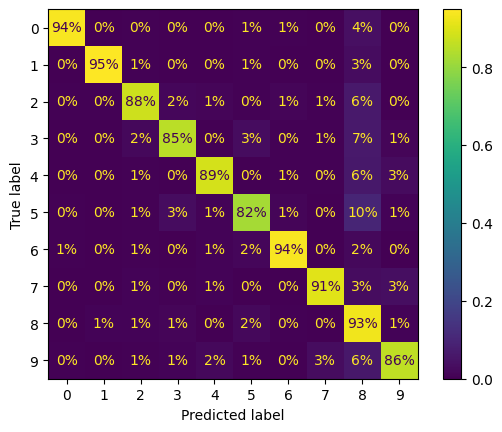

In [ ]:

ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred_cv_sgd,normalize="true", values_format=".0%")
plt.show()

### KNeighborsClassifier

In [207]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# each input can have multiple labels.
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)

# new multi label
# This combines the two arrays side by side into a 2-column array.Each row now has 2 labels:
y_multilabel = np.c_[y_train_large, y_train_odd]
 

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train , y_multilabel)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


[False  True]
[[False  True]]


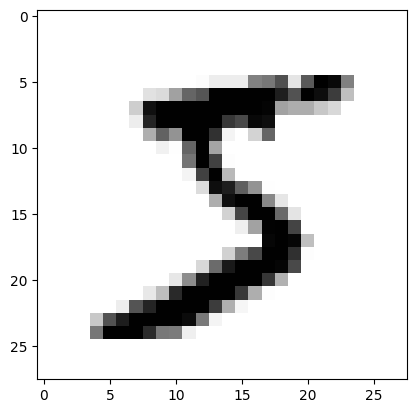

In [210]:
print(y_multilabel[0])
print(knn_clf.predict([x_train[0]]))
plot_img(x_train[0])
plt.show()

#### cross validation with KNN

In [211]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [212]:
"""
f1_large = F1 score for is_large
f1_odd = F1 score for is_odd
macro_f1 = (f1_large + f1_odd) / 2

"""

'\nf1_large = F1 score for is_large\nf1_odd = F1 score for is_odd\nmacro_f1 = (f1_large + f1_odd) / 2\n\n'